<center>
Открытый курс по машинному обучению
<center>
Автор материала: Екатерина Демидова, Data Scientist @ Segmento <br>



# <center>Домашнее задание № 2  <br> Визуальный анализ данных о публикациях на Хабрахабре</center>



In [314]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Загрузка и знакомство с данными

Данные с kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [2]:
df = pd.read_csv('../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [9]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [10]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [12]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           )

,url,domain,published,author,flow,polling,title
count,134137,134137,134137,97657,97048,134137,134137
unique,134137,2,130291,22077,6,2,133628
top,https://habrahabr.ru/post/294416/,habrahabr.ru,2011-06-14 15:52:00,@alizar,develop,False,"Интересные события, произошедшие в выходные"
freq,1,97048,39,5292,53318,129412,56


In [13]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [14]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [145]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [157]:
pubs = df.groupby(['year', 'month'])[['title']].count().sort_values('title', ascending=False)

print('year of most popular publication: ', list(pubs['title'].to_dict())[0][0])
print('month of most popular publication: ', list(pubs['title'].to_dict())[0][1])

year of most popular publication:  2015
month of most popular publication:  3


### Ответ

* **март 2015**


## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [168]:
pubs_3_2015 = df[(df['year'] == 2015) & (df['month'] == 3)]

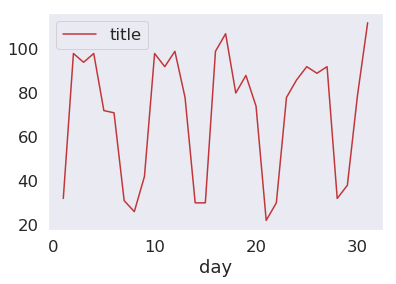

In [174]:
pubs_3_2015.groupby('day')[['title']].count().plot();

#graph for both domains

In [170]:
pubs_3_2015_h = df[(df['year'] == 2015) & (df['month'] == 3) & (df['domain'] == 'habrahabr.ru')]

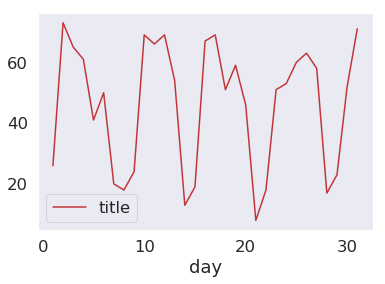

In [268]:
pubs_3_2015_h.groupby('day')[['title']].count().plot()

#graph for habrahabr

In [165]:
pubs_3_2015_g = df[(df['year'] == 2015) & (df['month'] == 3) & (df['domain'] == 'geektimes.ru')]

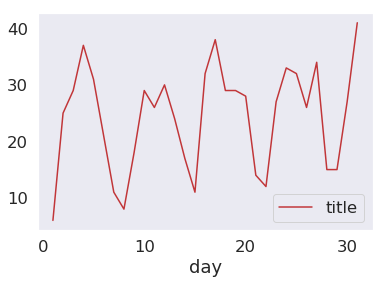

In [175]:
pubs_3_2015_g.groupby('day')[['title']].count().plot();

#graph for geektimes

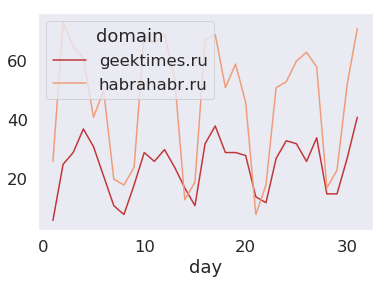

In [180]:
pubs_3_2015.pivot_table(index='day', values='title', aggfunc='count', columns='domain').plot();

#graphs for two domains

In [331]:
pubs_3_2015[pubs_3_2015['dayofweek'] == 6].pivot_table(index='day',
                                                       values='title',
                                                       aggfunc='count',
                                                       columns='domain')


domain,geektimes.ru,habrahabr.ru
day,,
7,11,20
14,17,13
21,14,8
28,15,17


### Ответ

* Нет выделяющихся дней
* Есть дни, когда на гиктаймс больше статей
* **По субботам публикуют примерно одинаковое количество статей**

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [253]:
df.groupby('hour')[['views']].mean().sort_values('views', ascending=False).head(1)

# проверим среднее кол-во просмотров для каждого часа

,views
hour,
6,21354.310115


#### Больше всего просмотров у статей, выложенных в 6 часов утра

In [212]:
df.groupby('hour')[['comments']].mean().sort_values('comments', ascending=False).head(1)

# проверим среднее кол-во комментариев для каждого часа

,comments
hour,
4,53.657273


#### Больше всего комментарив у статей, выложенных в 4 часа утра


In [243]:
df[df['domain'] == 'geektimes.ru'].sort_values('comments', ascending=False).head(1)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2,1


#### Максимальное число комментариев на гиктаймс набрала статья, опубликованная в 2 часа ночи


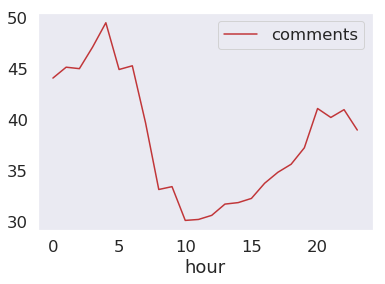

In [337]:
df[df['domain'] == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot();

# mean amount of comments by hours

#### Дневные статьи комментируют меньше всего

### Ответ
* Чтобы набрать больше просмотров, публиковаться нужно в 6 часов утра

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [335]:
df[df['author'].isin([
    '@Mordatyj', '@Mithgol', 
    '@alizar', '@ilya42'])].groupby('author')[['votes_minus']]\
    .mean().sort_values('votes_minus', ascending = False).head(1)

,votes_minus
author,
@Mithgol,20.481081


### Ответ
* **@Mithgol**

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

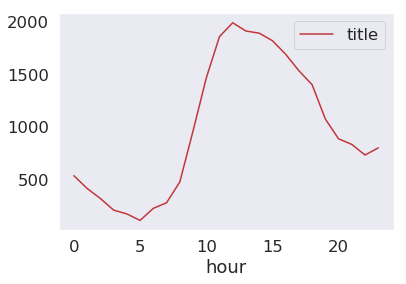

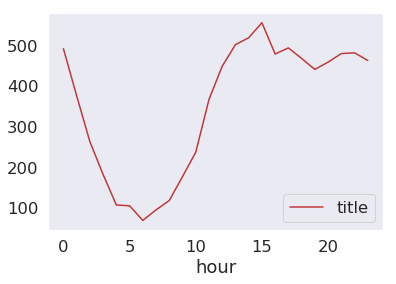

In [348]:
monday = df[df['dayofweek'] == 1]
monday.groupby('hour')[['title']].count().plot();

saturday = df[df['dayofweek'] == 6]
saturday.groupby('hour')[['title']].count().plot();


### Ответ
* Нет